# Matplotlib: Box Plots

* df.plot(kind='box')

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#! pip install adjustText
from adjustText import adjust_text


# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs in the US

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [5]:
# Drop NaN values from the column for plotting

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(20)

109935     65000.00000
151017     84500.00000
527276    145000.00000
474421    100000.00000
609357     88000.00000
599384    106000.00000
275502    115000.00000
391339     65000.00000
745392     47500.00000
305534    107500.00000
112945    110000.00000
761955    100000.00000
470954     64140.00000
284659     90000.00000
478303    115000.00000
772873     65000.00000
214029    110000.00000
564222     99746.90625
459265     72500.00000
738180     85000.00000
Name: salary_year_avg, dtype: float64

<Axes: >

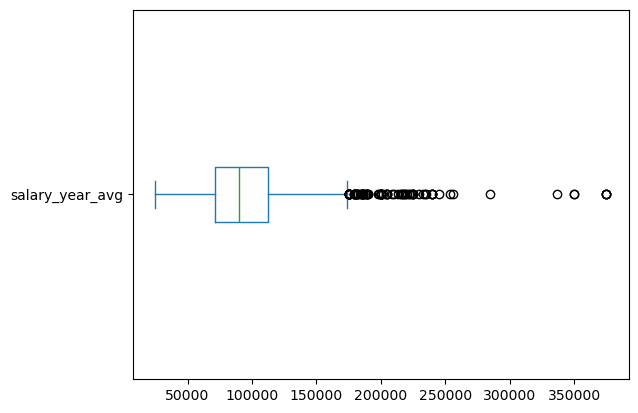

In [7]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\hernandez.j2\AppData\Local\Temp\ipykernel_32244\3867266520.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


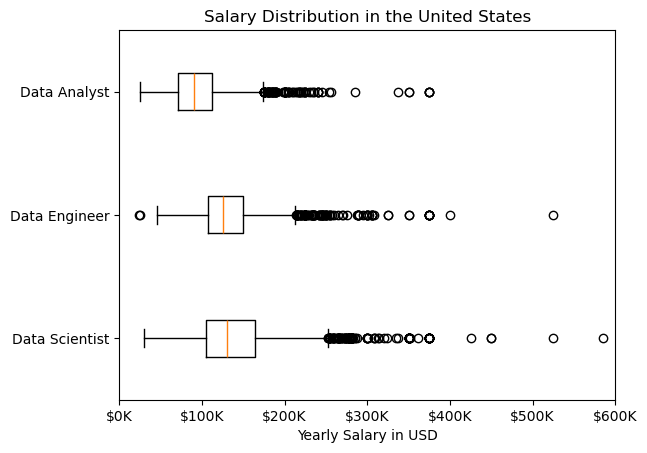

In [29]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()


df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title] ['salary_year_avg'] for job_title in job_titles ]

job_list[0]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary in USD')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int (x/1000)}K'))
plt.xlim(0,600_000)

plt.show()
